# Project: Movies Dataset

## Files to review:
- You can review the file called **```Assessing Data```** where I analyzed the dataset we are going to work with.
- I also did some data cleansing in the file called **```Data Cleansing```**
- In this notebook, we're going to answer some questions using visuals and descriptive statistics

## Questions to Answer:
In this part I will write any question I want to answer, so I don't forget.
- [x] Highest revenue per year, and from which movie
- [x] What's the genre that generated more revenue and which one is the genre that has the best votes.
- [x] Average Revenue per Genre from 1960-2015
- [x] Correlations between Revenue and Budget
- [x] Correlations between Budget and Popularity

## Table of Contents
<ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#q1">Question 1</a></li>
<li><a href="#q2">Question 2</a></li>
<li><a href="#q3">Question 3</a></li>
<li><a href="#q4">Question 4</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I think movies is a topic we all like and feel familiar with and that's why I chose to work with this dataset. In the following sections **I'll be analyzing each of the questions stated above to understand more about this dataset and about the movie industry.**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='eda'></a>
## Exploratory Data Analysis


> With the goal of addressing the research questions I used descriptive statistics to find insights and relationships between variables. 

<a id='q1'></a>
> ### Question 1: Highest revenue per year, and from which movie
- The movie that made **1907.005842** Million USD Dollar in revenue is **Jaws**

In [2]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df = pd.read_csv('clean_dataset.csv')
df.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,variable,value
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,0,Action
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,0,Action


> ### Function for plotting
I'm going to create a function that I'm going to call everytime I want to create a plot.

In [3]:
def plotTitle(title, xlabel, ylabel):
    """
    This is a function that I will call every time I want to create a plot 
    """
    plt.title(title, fontsize = 22)
    plt.xlabel(xlabel, labelpad = 15, fontsize = 18)
    plt.ylabel(ylabel, labelpad = 15, fontsize = 18) 

> ### Analyzing Single Variables:
In my analyzis I'll be reviewing the variables:
- ```release_year```
- ```vote_average```
- ```asdads```

In [24]:
df.release_year.describe()

count    54215.000000
mean      2001.315595
std         12.812825
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

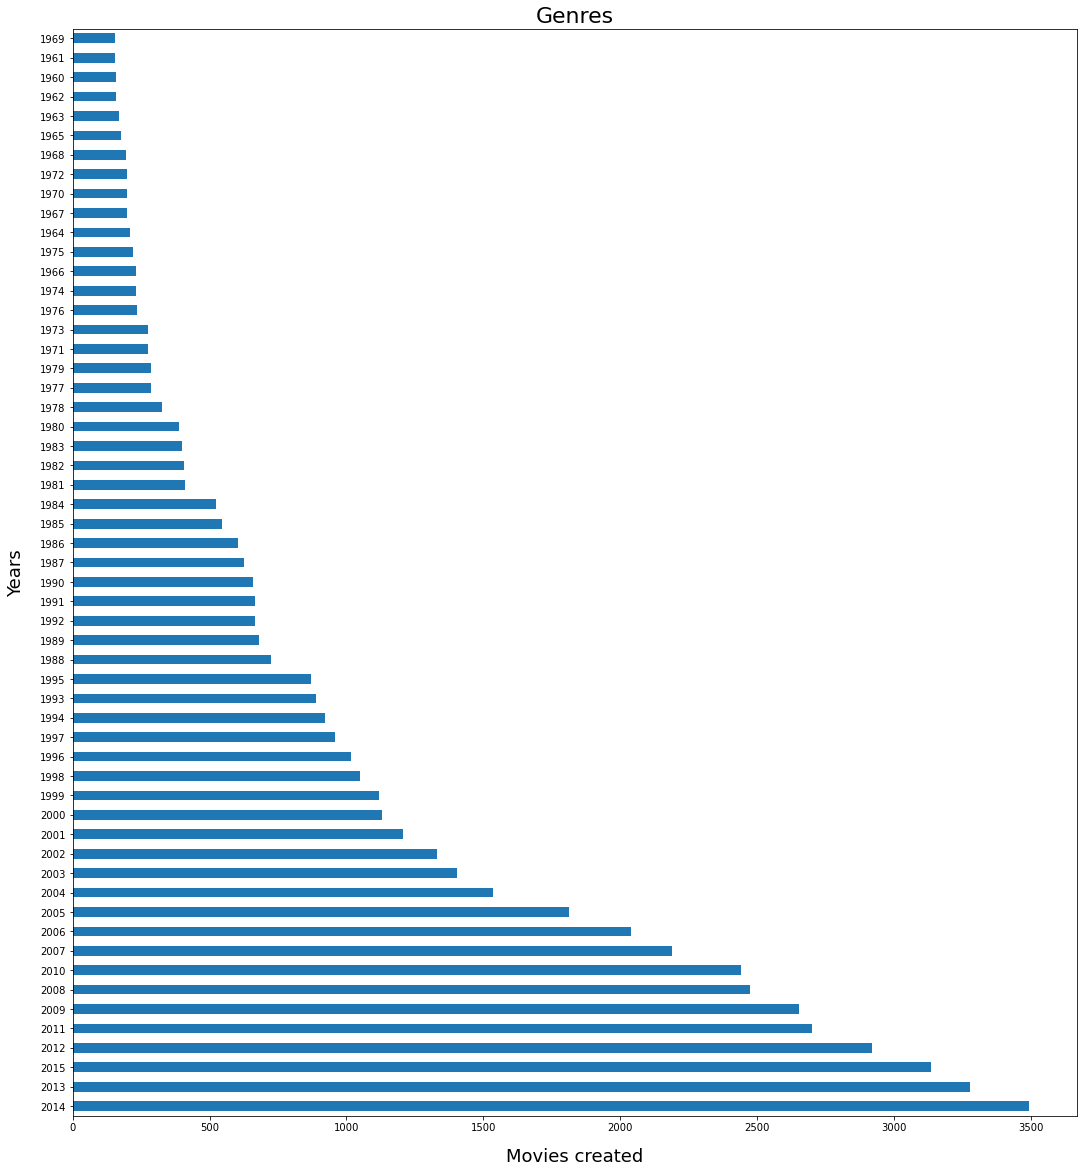

In [25]:
df['release_year'].value_counts().plot(kind = 'barh', figsize =(18,20))
plotTitle('Genres', 'Movies created', 'Years');

In our previous graph, we can appreciate that the amount of movies created were incrementing among the years

In [28]:
df.popularity.describe()

count    54215.000000
mean         0.647456
std          1.000949
min          0.000065
25%          0.208168
50%          0.384555
75%          0.715437
max         32.985763
Name: popularity, dtype: float64

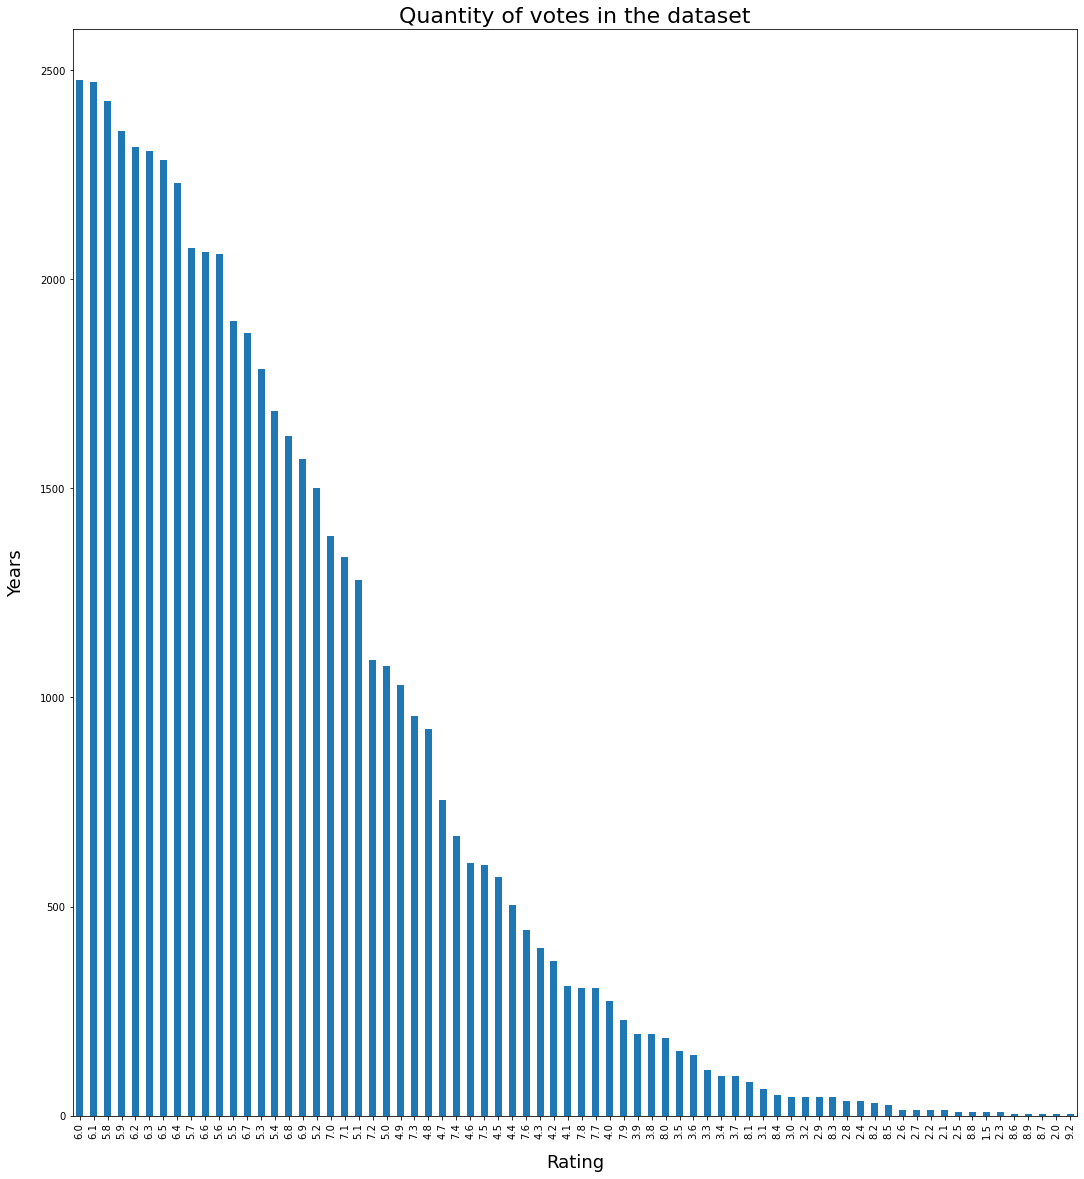

In [29]:
df['vote_average'].value_counts().plot(kind = 'bar', figsize =(18,20))
plotTitle('Quantity of votes in the dataset', 'Rating', 'Years');

In our previous graph, we can appreciate that the quantity of votes in our dataset and the rating

In the following code, we will analyzing the popularity of the genre over the years

In [5]:
df.popularity.describe()

release_year  value          
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Crime              0.346480
              Drama              0.566305
                                   ...   
2015          Science Fiction    2.245603
              TV Movie           0.260574
              Thriller           1.401877
              War                1.284511
              Western            3.178796
Name: popularity, Length: 1049, dtype: float64

In [9]:
popularitydf = popularity.unstack()
popularitydf

value,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,NaN,0.396000,0.346480,NaN,0.566305,0.278064,0.428248,0.194948,0.412364,0.591450,0.423531,NaN,0.541227,0.327905,NaN,0.811910,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,NaN,0.432233,0.755722,0.154073,0.113651,0.334463,0.254578,0.564749,0.712793,0.426036,0.274103,NaN,NaN,0.531184,0.210021
1962,0.708945,0.942513,NaN,0.273183,0.472816,NaN,0.392000,0.323463,0.235542,0.235542,0.600060,0.179368,0.323933,0.259220,0.365621,0.179212,NaN,0.760582,0.506162,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.552368,NaN,0.322448,0.852632,0.214071,0.351647,0.481618,0.376901,NaN,0.421033,0.399573,0.467836,NaN,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.261690,NaN,0.364818,0.878299,0.599791,0.152209,0.316377,0.189650,0.753799,0.308091,0.221586,0.226636,NaN,0.622580,0.930959,0.127679
1965,0.451373,0.581821,0.600975,0.358721,0.387277,NaN,0.305288,0.662713,NaN,0.004770,0.173948,0.124838,0.968850,0.209204,0.622780,0.101956,0.600975,0.343072,0.312124,0.191833
1966,0.263347,0.293593,0.585717,0.323658,0.340702,0.080598,0.339766,0.398896,0.424771,0.361556,0.335649,0.094397,NaN,0.234951,0.351903,0.317790,NaN,0.273869,0.290460,0.244657
1967,0.723570,1.025547,1.348805,0.434822,0.538359,0.095101,0.511467,0.962015,0.187009,NaN,NaN,0.289964,0.151540,0.401409,0.417445,0.187465,NaN,0.701979,0.485288,0.189740
1968,0.365562,1.109147,0.302135,0.329548,0.555919,NaN,0.377323,0.426263,0.445584,NaN,0.481894,0.558404,0.515485,1.519456,0.260356,1.343642,NaN,0.555919,0.316055,0.621202


#### Creation of two new columns

Before I dive deeper into the analysis, I created two new columns:
- ```revenue_in_USD_2010```: The reason for this is so that the reader can read better the numbers in the graphs.
- ```budget_in_USD_2010```: The reason for this is so that the reader can read better the numbers in the graphs.

I also eliminated the negative ```revenue_in_USD_2010``` values, because there were so little negative values, that it was biasing my visualizations.

In [ ]:
df["revenue_adj"] = df["revenue_adj"].astype(int)

In [ ]:
df = df.rename(columns = {'revenue_adj': 'revenue_in_USD_2010', 'budget_adj': 'budget_in_USD_2010'}, inplace = False)

In [ ]:
df['revenue_in_millions'] = df['revenue_in_USD_2010']/1000000

In [ ]:
df['budget_in_millions'] = df['budget_in_USD_2010']/1000000

In [ ]:
df = df[(df['revenue_in_millions'] >= 0)]

#### I created a temporary dataframe with the values of:
- ```release_year```
- ```revenue_in_millions```
- ```original_title```

And then I just sorted the values from ```release_year``` and ```revenue_in_millions```. Once that I did this, I created a **line graph** to evaluate the revenue of the **best movies** from **1960-2015**.

In [ ]:
temp_df = df[['release_year', 'revenue_in_millions', 'original_title']].sort_values(['release_year', 'revenue_in_millions'], ascending=False)

### Highets Revenue Per Year

In [ ]:
pd.DataFrame(temp_df.groupby(['release_year']).agg({'revenue_in_millions':[max], 'original_title':['first']}))

### Revenue in Millions from 1960-2015

In [ ]:
sns.set(font_scale=1.4)
temp_df.set_index('release_year')['revenue_in_millions'].plot(figsize=(20, 10), linewidth=2.5, color='blue', xlim = (1960, 2016))
#using the plotTitle Function that I created
plotTitle("Best movies revenues over years","Years", "Revenue in Millions USD (2010)")

### Movie that made the most money

I also wanted to review which movie has made most of the money in my dataset

In [ ]:
df.loc[df['revenue_in_millions'].idxmax()]

### Movie that made the less money

Which movie made less money

In [ ]:
df.loc[df['revenue_in_millions'].idxmin()]

<a id='q2'></a>
### Question 2: What's the genre that has more movies and which one is the genre that has the best votes?

- To do this I created a groupby of a new column named ```value``` which has all the genres from each movie and I grouped it with the variable ```revenue_in_millions```

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
genres_revenue = df.groupby('value')["revenue_in_millions"].sum().sort_values(ascending = True)

In [ ]:
#Plotting the revenue for each genre
ax = genres_revenue.plot(kind = 'barh',figsize =(10,10), legend = True)
#using the plotTitle Function that I created
plotTitle("Revenue Per Genre","Genres", "Revenue in Millions USD (2010)")

### Knowing which are the most popular genres
- I'm going to review which genres do better over the years, stayinng with just the top 5 genres.

In [ ]:
genres_pop = df.groupby('value')["popularity"].sum().sort_values(ascending = False)
genres_pop

To **better understand** the data, I drop the genres that I don't want to track, I just want to see the top 8 genres.

In [ ]:
test_df = pd.read_csv('clean_dataset - Copy.csv')
def dropping():
    """
    This function will help me eliminate the genres that I don't want to analyze.
    """
    genres = ['Horror', 'Animation', 'Mystery', 'Music', 'War', 'Western', 'Documentary', 'TV Movie', 'Foreign', 'Fantasy', 'Family', 'Crime']
    for genre in genres:
        genre_over_time = test_df.drop(test_df.index[test_df['value'] == genre], inplace = True)

# calling the function dropping
dropping()

In [ ]:
genre_over_time = test_df.groupby(['release_year','value'])['popularity'].mean()
genre_over_time

In [ ]:
newdf = genre_over_time.unstack()
newdf.head(2)

In [ ]:
newdf.plot(figsize= (15,8), linewidth=3, xlim = (1960,2015), ylim = (0,4))
plotTitle("Popularity of genres change over years","Years (1960-2015)", "Average popularity")

<a id='q3'></a>
### Question 3: Average Revenue per Genre from 1960-2018

> Revenue per Genre, in order to do this I created a groupby function between ```value``` and ```revenue_in_millions```

In [ ]:
genres_avg_revenue = df.groupby('value')["revenue_in_millions"].mean().sort_values(ascending = True)

In [ ]:
ax = genres_avg_revenue.plot(kind = 'barh',figsize =(10,10), legend = True)
plotTitle("Revenue Per Genre","Revenue in Millions USD", "Genres")

<a id='q4'></a>
### Question 4: Correlations between revenue and budget

- To create this correlation, I first filter where all the values from ```revenue_in_millions``` are positive, because the negative values bias the visualization. 

In [ ]:
correlation = df[(df['revenue_in_millions'] >= 0)]
correlation.revenue_in_millions

In [ ]:
df.plot(x='budget_in_millions', y='revenue_in_millions', kind = 'scatter', figsize = (12,10), ylim = (0,2000), xlim = (0,300))
plotTitle("Correlation between a movie's Budget and its revenue","Budget (in Millions) to create a Movie", "Revenue in Millions")

### Correlation between a Movie's Budget and its Popularity

- We can see that there is a positive relationship between this 2 variables. 

In [ ]:
df.plot(x='budget_in_millions', y='popularity', kind = 'scatter', figsize = (12,10), ylim = (0,10), xlim = (0,300))
plotTitle("Correlation between a movie's Budget and its popularity" ,"Budget (in Millions) to create a Movie", "Popularity")

<a id='conclusions'></a>
## Conclusions

> - As I analyzed this dataset, I found out that the better the budget, **the better** the chances for the movie to be more popular. I think is also important to get to know how correlations works.
- I also found out that **Action**, **Adventure**, **Drama**, **Commedy** and **Thriller** are the genres that have generated the most revenue from 1965 to 2015. 
- Overall I had a lot of fun analyzing this dataset, and if the reader might have any suggestions on this work, please let me know.